In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(30)

In [ ]:
label0 = np.zeros(15, dtype=np.int32)
label1 = np.ones(15, dtype=np.int32)
label = np.concatenate([label0, label1])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
A0 = np.random.uniform(low=1, high=15, size=(15,))
A1 = np.random.uniform(low=15, high=30, size=(15,))
A = np.concatenate([A0, A1])
A

NameError: ignored

In [ ]:
B0 = np.random.uniform(low=1, high=15, size=(15,))
B1 = np.random.uniform(low=15, high=30, size=(15,))
B = np.concatenate([B0, B1])
B

array([12.17179316,  6.53648343, 10.91263711,  3.04333741,  9.52025857,
        7.12318788,  7.44409935, 12.23453212,  1.98910602,  5.8608359 ,
        6.42791491,  2.24537819, 11.54668602,  8.39217003, 10.68666893,
       15.44867635, 18.47757655, 19.54551999, 15.00649903, 27.73872259,
       16.80552989, 20.34077156, 22.32889548, 20.76325502, 16.70914202,
       25.73383228, 19.97115801, 28.05372629, 16.22609869, 29.23719448])

In [ ]:
df = pd.DataFrame({'A': A, 'B': B, 'Label': label})
print(df)

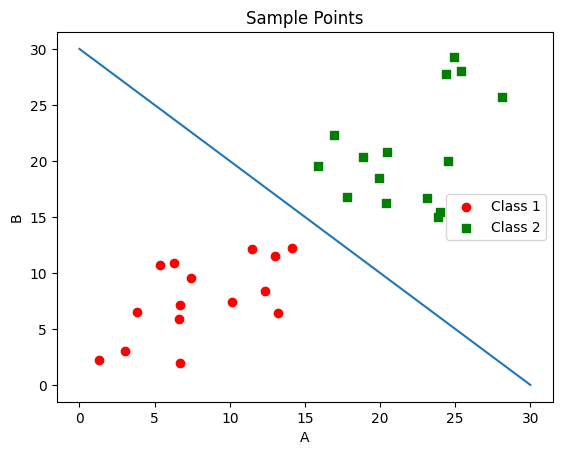

In [ ]:
class1_A = [A[i] for i in range(15)]
class1_B = [B[i] for i in range(15)]

class2_A = [A[i] for i in range(15,30)]
class2_B = [B[i] for i in range(15,30)]

plt.scatter(class1_A, class1_B, color='red', marker='o', label='Class 1')
plt.scatter(class2_A, class2_B, color='green', marker='s', label='Class 2')

plt.plot([30, 0], [0, 30])

plt.xlabel('A')
plt.ylabel('B')
plt.title('Sample Points')
plt.legend()
plt.show()

In [ ]:
y = np.vstack((A*A, A*B, B*B, A-B, A+B, np.full(A.shape, 0.5), np.full(A.shape, 0.2), np.ones_like(A))).T

y[label == 1] = -y[label == 1]
print(y)

[[ 1.32486935e+02  1.40100953e+02  1.48152549e+02 -6.61496245e-01
   2.36820901e+01  5.00000000e-01  2.00000000e-01  1.00000000e+00]
 [ 1.48525456e+01  2.51909539e+01  4.27256157e+01 -2.68258338e+00
   1.03903835e+01  5.00000000e-01  2.00000000e-01  1.00000000e+00]
 [ 3.94955008e+01  6.85809545e+01  1.19085649e+02 -4.62809251e+00
   1.71971817e+01  5.00000000e-01  2.00000000e-01  1.00000000e+00]
 [ 9.14279311e+00  9.20215513e+00  9.26190257e+00 -1.96322117e-02
   6.06704260e+00  5.00000000e-01  2.00000000e-01  1.00000000e+00]
 [ 5.47315067e+01  7.04315824e+01  9.06353233e+01 -2.12218404e+00
   1.69183331e+01  5.00000000e-01  2.00000000e-01  1.00000000e+00]
 [ 4.50676697e+01  4.78197114e+01  5.07398056e+01 -4.09942048e-01
   1.38364337e+01  5.00000000e-01  2.00000000e-01  1.00000000e+00]
 [ 1.02385411e+02  7.53236227e+01  5.54146151e+01  2.67446828e+00
   1.75626670e+01  5.00000000e-01  2.00000000e-01  1.00000000e+00]
 [ 1.99297604e+02  1.72718320e+02  1.49683776e+02  1.88274822e+00
   

many at a  time


In [ ]:
def perceptron_many_at_a_time(Y, W, learning_rate, max_iteration):
  for iteration in range(max_iteration):
    res = np.zeros(Y.shape[0])
    for i, point in enumerate(Y):
      res[i] = np.dot(point, W)
    if all(elem > 0 for elem in res):
      return iteration + 1, W
    Y_sum = np.zeros(Y.shape[1])
    for i, point in enumerate(Y):
      if(res[i] <= 0):
        Y_sum += point
    W = W + learning_rate * Y_sum

  return -1, W

In [ ]:
learning_rates = np.arange(0.1, 1.1, 0.1)
print(learning_rates)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
many_r = np.zeros(learning_rates.shape, dtype=np.int32)

for i, l_r in enumerate(learning_rates):
  many_r[i], _ = perceptron_many_at_a_time(y, np.random.rand(y.shape[1]), l_r, 1000)

print(many_r)

[204 220 215 204 220 220 204 204 204 204]


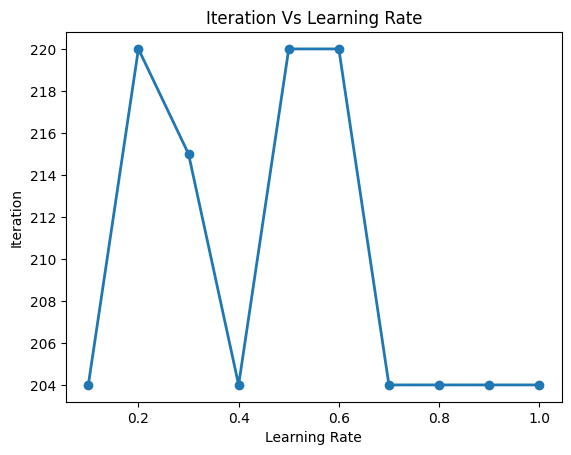

In [ ]:
plt.plot(learning_rates,many_r,linewidth=2, marker ='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iteration')
plt.title('Iteration Vs Learning Rate')
plt.show()

ONE at a time


In [ ]:
def perceptron_one_at_a_time(Y, W, learning_rate, max_iteration):
    for iteration in range(max_iteration):
        converged = True
        for i, point in enumerate(Y):
            res = np.dot(point, W)
            if res <= 0:
                W = W + learning_rate * point
                converged = False
        if converged:
            return iteration + 1, W
    return -1, W


In [ ]:
learning_rates = np.arange(0.1, 1.1, 0.1)
print(learning_rates)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
one_r = np.zeros(learning_rates.shape, dtype=np.int32)

for i, l_r in enumerate(learning_rates):
    _, W = perceptron_one_at_a_time(y, np.random.rand(y.shape[1]), l_r, 1000)
    converged = True
    for j, point in enumerate(y):
        res = np.dot(point, W)
        if res <= 0:
            converged = False
            break
    if converged:
        one_r[i] = 1000  # Set the maximum number of iterations as the result
    else:
        one_r[i] = -1  # Indicate that the algorithm did not converge

print(one_r)

[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [ ]:
one_r = np.zeros(learning_rates.shape, dtype=np.int32)

for i, l_r in enumerate(learning_rates):
  one_r[i], _ = perceptron_one_at_a_time(y, np.random.rand(y.shape[1]), l_r, 1000)

print(one_r)

[208 203 209 208 209 209 209 209 169 169]


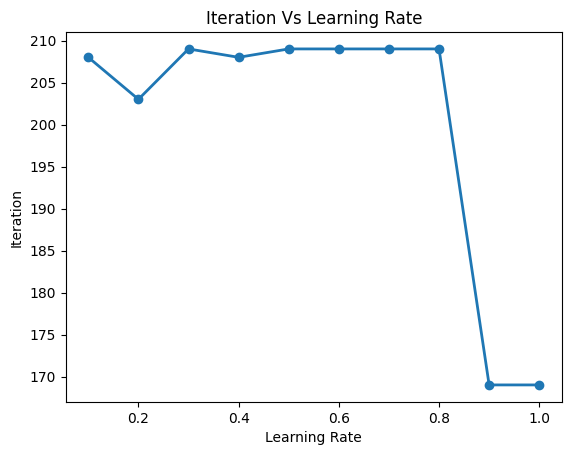

In [ ]:
plt.plot(learning_rates,one_r,linewidth=2, marker ='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iteration')
plt.title('Iteration Vs Learning Rate')
plt.show()

end of one at a time


In [ ]:
learning_rates = np.arange(0.1, 1.1, 0.1)
convergence_iterations = []

for learning_rate in learning_rates:
    _, W = perceptron_many_at_a_time(y, np.random.rand(y.shape[1]), learning_rate, 1000)
    converged = True
    for i, point in enumerate(y):
        res = np.dot(point, W)
        if res <= 0:
            converged = False
            break
    if converged:
        convergence_iterations.append(1000)  # Set the maximum number of iterations as the result
    else:
        convergence_iterations.append(-1)  # Indicate that the algorithm did not converge

print("Learning Rates:", learning_rates)
print("Convergence Iterations:", convergence_iterations)


Learning Rates: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Convergence Iterations: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


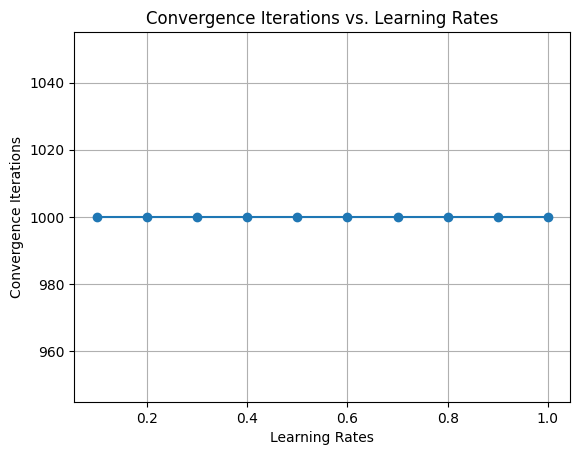

In [ ]:
import matplotlib.pyplot as plt

learning_rates = np.arange(0.1, 1.1, 0.1)
convergence_iterations = []

for learning_rate in learning_rates:
    _, W = perceptron_many_at_a_time(y, np.random.rand(y.shape[1]), learning_rate, 1000)
    converged = True
    for i, point in enumerate(y):
        res = np.dot(point, W)
        if res <= 0:
            converged = False
            break
    if converged:
        convergence_iterations.append(1000)  # Set the maximum number of iterations as the result
    else:
        convergence_iterations.append(-1)  # Indicate that the algorithm did not converge

plt.plot(learning_rates, convergence_iterations, marker='o')
plt.xlabel('Learning Rates')
plt.ylabel('Convergence Iterations')
plt.title('Convergence Iterations vs. Learning Rates')
plt.grid(True)
plt.show()



<ipython-input-45-c6c3ed734860>:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  output = np.array(output)
<ipython-input-45-c6c3ed734860>:50: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  output[:, 1] = np.where(output[:, 1] == np.ones_like(y[0]), 'All Ones', np.where(output[:, 1] == np.zeros_like(y[0]), 'All Zeros', 'Random'))


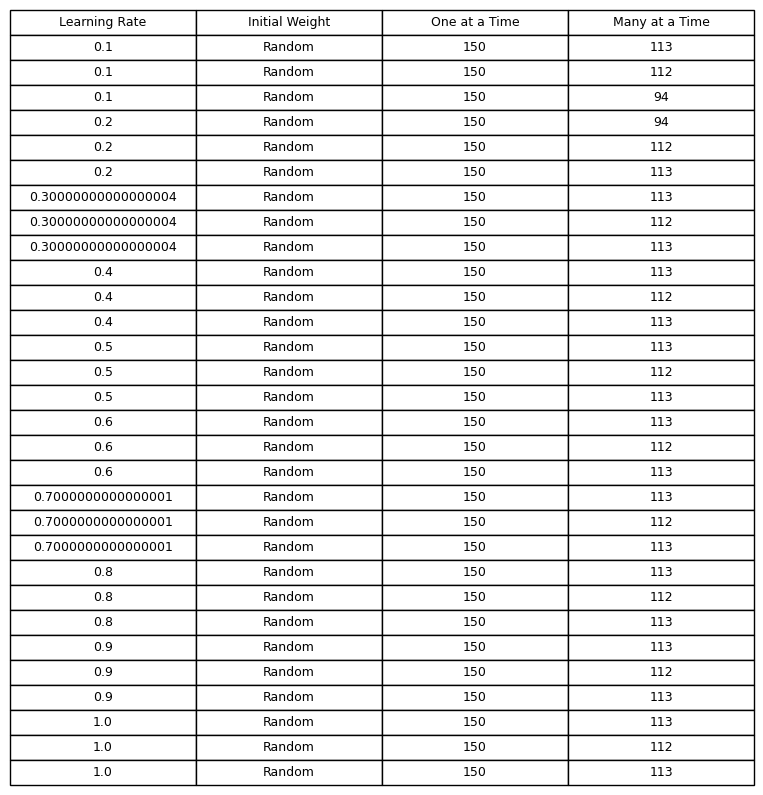

In [ ]:

def updateWeight(w, alpha, y_mc, update_cnt):
    return w + alpha * y_mc, update_cnt + 1 * (1 if sum(y_mc) != 0 else 0)

def oneTime(y, w, alpha, iteration=150):
    it = 0
    update_cnt = 0
    points = y.shape[0]

    while it < iteration:
        res = np.zeros((points, 1))
        for i in range(points):
            val = np.dot(y[i], w.T)
            res[i] = 0 if val > 0 else 1
            w, update_cnt = updateWeight(w, alpha, res[i] * y[i], update_cnt)
        it += 1
        if sum(res) == 0:
            break
    return it, update_cnt

def manyTime(y, w, alpha, iteration=150):
    it = 0
    update_cnt = 0
    points = y.shape[0]

    while it < iteration:
        res = np.zeros((points, 1))
        for i in range(points):
            val = np.dot(y[i], w.T)
            res[i] = 0 if val > 0 else 1
        it += 1
        if sum(res) == 0:
            break
        else:
            w, update_cnt = updateWeight(w, alpha, sum(res * y), update_cnt)
    return it, update_cnt

learning_rates = np.arange(0.1, 1.1, 0.1)
initial_weights = [np.ones_like(y[0]), np.zeros_like(y[0]), np.random.rand(len(y[0]))]

output = []
for lr in learning_rates:
    for w_init in initial_weights:
        w_one_time = w_init.copy()
        w_many_time = w_init.copy()
        iterations_one_time, _ = oneTime(y, w_one_time, lr)
        iterations_many_time, _ = manyTime(y, w_many_time, lr)
        output.append([lr, w_init, iterations_one_time, iterations_many_time])

output = np.array(output)
output[:, 1] = np.where(output[:, 1] == np.ones_like(y[0]), 'All Ones', np.where(output[:, 1] == np.zeros_like(y[0]), 'All Zeros', 'Random'))

fig, ax = plt.subplots()
table_data = []
for i in range(output.shape[0]):
    table_data.append([output[i, 0], output[i, 1], int(output[i, 2]), int(output[i, 3])])

colHeader = ['Learning Rate', 'Initial Weight', 'One at a Time', 'Many at a Time']

table = ax.table(cellText=table_data, colLabels=colHeader, cellLoc='center', loc='center')
table.set_fontsize(12)
table.scale(1.5, 1.5)
ax.axis('off')
plt.show()